<a href="https://colab.research.google.com/github/HansHenseler/masdav2024/blob/main/Part_9_Exercises_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysing and visualising geolocation data

Part 9

Master of Advanced Studies in Digital Forensics & Cyber Investigation

Data Analytics and Visualization for Digital Forensics

(c) Hans Henseler, 2024

# Part 9

Importing libraries

In [ ]:
# Need to install various packages.
#
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal
# Install rtree - Geopandas requirment
!apt install python3-rtree
# Install Geopandas
!pip install geopandas
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt
import folium
import plotly_express as px

In [ ]:
!sudo apt-get install -y exiftool

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Exercises

## 1 Analyse pictures from an Android 10 phone for geotags and plot on a map

In [4]:
# Download Android_10.zip from Digital Corpora (takes app 10 minutes to download in Google Colab)
#
!wget "https://digitalcorpora.s3.amazonaws.com/corpora/mobile/android_10/Android_10.zip"

--2024-08-23 07:34:33--  https://digitalcorpora.s3.amazonaws.com/corpora/mobile/android_10/Android_10.zip
Resolving digitalcorpora.s3.amazonaws.com (digitalcorpora.s3.amazonaws.com)... 52.92.187.225, 52.92.193.49, 52.92.177.137, ...
Connecting to digitalcorpora.s3.amazonaws.com (digitalcorpora.s3.amazonaws.com)|52.92.187.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10476724716 (9.8G) [application/zip]
Saving to: ‘Android_10.zip’

Android_10.zip      100%[===================>]   9.76G  16.3MB/s    in 7m 11s  

2024-08-23 07:41:45 (23.2 MB/s) - ‘Android_10.zip’ saved [10476724716/10476724716]



In [6]:
# In this zip there is a zip file containing a logical extraction of the file system
# /Android 10 Image with Documentation/Non-Cellebrite Extraction/Pixel 3.zip
# extract this zip file (takes about 4 minutes, use -j to ignore file path)

!unzip -j Android_10.zip  Android\ 10\ Image\ with\ Documentation/Non-Cellebrite\ Extraction/Pixel\ 3.zip

Archive:  Android_10.zip
  inflating: Pixel 3.zip             


In [7]:
# investigate the contents of this zip file for jpg files, extract, run the exiftool and plot on a map
# hint: use the unzip -l option (e.g. to find *.jpg)

!unzip -l "Pixel 3.zip" | grep jpg

    22062  2020-02-08 14:54   Pixel 3/data/data/com.enflick.android.TextNow/app_Leanplum_Documents/InApp_Countdown_Timer (2).jpg
    15012  2020-02-08 14:54   Pixel 3/data/data/com.enflick.android.TextNow/app_Leanplum_Documents/nonsale_avatar.jpg
   135034  2020-02-08 14:54   Pixel 3/data/data/com.enflick.android.TextNow/app_Leanplum_Documents/nonsale_defaultinterstitial_extra101.jpg
    41336  2020-01-31 21:15   Pixel 3/data/data/com.google.android.googlequicksearchbox/files/recently/thisisdfir@gmail.com-3692132869510698294.jpg
    13696  2020-01-31 21:14   Pixel 3/data/data/com.google.android.googlequicksearchbox/files/recently/thisisdfir@gmail.com-5812264224591469663.jpg
    29512  2020-01-31 21:13   Pixel 3/data/data/com.google.android.googlequicksearchbox/files/recently/thisisdfir@gmail.com-6982875141504110754.jpg
   577563  2020-01-29 11:55   Pixel 3/data/data/com.google.vr.apps.ornament/app_preview_temp/shared/com.google.vr.apps.ornament.content.stickers.spark/spark_preview.jpg


In [8]:
# Export all *.jpg and ignor paths (-j option) with destination  ./images (-d ./images).
# Note: choose N for None if unzip asks if it must overwrite a file.
#
!unzip -j -d ./images "Pixel 3.zip" "*.jpg"

Archive:  Pixel 3.zip
  inflating: ./images/InApp_Countdown_Timer (2).jpg  
  inflating: ./images/nonsale_avatar.jpg  
  inflating: ./images/nonsale_defaultinterstitial_extra101.jpg  
  inflating: ./images/thisisdfir@gmail.com-3692132869510698294.jpg  
  inflating: ./images/thisisdfir@gmail.com-5812264224591469663.jpg  
  inflating: ./images/thisisdfir@gmail.com-6982875141504110754.jpg  
  inflating: ./images/spark_preview.jpg  
 extracting: ./images/6BIqfFk.jpg    
 extracting: ./images/CXW0PEe.jpg    
  inflating: ./images/82150035d650b73619f729f8797a2979.jpg  
  inflating: ./images/043a8097f43c6fb006dd4a97ee9447be.jpg  
  inflating: ./images/04a860c62dd3c32bc987962bf50826f0.jpg  
  inflating: ./images/0cf03778a47919ffa242abbb61045546.jpg  
  inflating: ./images/15093b05575b105cfb87ca1f977ba155.jpg  
  inflating: ./images/235cf218066aa4e50fab6637df280536.jpg  
  inflating: ./images/2f8011301fcab6a4e63fd3d3f58bdf2e.jpg  
  inflating: ./images/40a02bf1a684b89c672336492d738f56.jpg  
  i

In [9]:
!exiftool -csv -c '%+.6f' -gpslatitude -gpslongitude -GPSLatitudeRef -GPSLongitudeRef -r -ext jpg -T ./images > data.csv

In [10]:
!cat data.csv

SourceFile,GPSLatitude,GPSLongitude,GPSLatitudeRef,GPSLongitudeRef
./images/87.jpg,-,-,-,-
./images/294.jpg,-,-,-,-
./images/r1920_10000999_cr_tail.jpg,-,-,-,-
./images/IMG-20200208-WA0001.jpg,-,-,-,-
./images/3.jpg,-,-,-,-
./images/104.jpg,-,-,-,-
./images/d62850bcd181e7a7f5f42569ddabb6cc.jpg,-,-,-,-
./images/235cf218066aa4e50fab6637df280536.jpg,-,-,-,-
./images/c589be27450a42e5da034da884c7d353.jpg,-,-,-,-
./images/98.jpg,-,-,-,-
./images/cthumb.jpg,-,-,-,-
./images/-2147483648_-210000.jpg,-,-,-,-
./images/15093b05575b105cfb87ca1f977ba155.jpg,-,-,-,-
./images/cebcca1c-94a2-4d42-863b-3fd80f3fd233.jpg,-,-,-,-
./images/06ceeadd-995d-4e3c-be2b-2a0b26dec374.jpg,-,-,-,-
./images/c23d86bc56e4e24438b11e3570e3d65d.jpg,-,-,-,-
./images/2f8011301fcab6a4e63fd3d3f58bdf2e.jpg,-,-,-,-
./images/fbdc1910bb970ee446fc23a7fa5601be.jpg,-,-,-,-
./images/64.jpg,-,-,-,-
./images/4.jpg,-,-,-,-
./images/image-2020-02-08-15-35-37.jpg,-,-,-,-
./images/291.jpg,-,-,-,-
./images/image0.jpg,-,-,-,-
./images/86.jpg,-

In [11]:
import pandas as pd
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SourceFile       131 non-null    object
 1   GPSLatitude      131 non-null    object
 2   GPSLongitude     131 non-null    object
 3   GPSLatitudeRef   131 non-null    object
 4   GPSLongitudeRef  131 non-null    object
dtypes: object(5)
memory usage: 5.2+ KB


In [12]:
df

,SourceFile,GPSLatitude,GPSLongitude,GPSLatitudeRef,GPSLongitudeRef
0,./images/87.jpg,-,-,-,-
1,./images/294.jpg,-,-,-,-
2,./images/r1920_10000999_cr_tail.jpg,-,-,-,-
3,./images/IMG-20200208-WA0001.jpg,-,-,-,-
4,./images/3.jpg,-,-,-,-
...,...,...,...,...,...
126,./images/f152cd39d46e6c1c2668422e32227c0e.jpg,-,-,-,-
127,./images/CXW0PEe.jpg,-,-,-,-
128,./images/thisisdfir@gmail.com-5812264224591469...,-,-,-,-
129,./images/66.jpg,-,-,-,-


In [13]:
df = df[df.GPSLatitude !=  '-'].reset_index()
df

,index,SourceFile,GPSLatitude,GPSLongitude,GPSLatitudeRef,GPSLongitudeRef
0,42,./images/IMG_20200213_195030.jpg,+35.658867,-78.874217,North,West
1,109,./images/IMG_20200209_132353.jpg,+35.660981,-78.879897,North,West
2,115,./images/IMG_20190917_082637.jpg,+35.735647,-78.636367,North,West


In [14]:
import geopandas as gpd
jpg_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.GPSLatitude, df.GPSLongitude))
jpg_gdf

,index,SourceFile,GPSLatitude,GPSLongitude,GPSLatitudeRef,GPSLongitudeRef,geometry
0,42,./images/IMG_20200213_195030.jpg,+35.658867,-78.874217,North,West,POINT (35.65887 -78.87422)
1,109,./images/IMG_20200209_132353.jpg,+35.660981,-78.879897,North,West,POINT (35.66098 -78.87990)
2,115,./images/IMG_20190917_082637.jpg,+35.735647,-78.636367,North,West,POINT (35.73565 -78.63637)


In [15]:
import folium


In [16]:
map = folium.Map(location = [35.660981,-78.879897,], tiles='OpenStreetMap' , width='75%',height='75%',zoom_start = 8)

# Create a geometry list from the GeoDataFrame
jpg_list = [[point.xy[0][0], point.xy[1][0]] for point in jpg_gdf.geometry ]

# Iterate through list and add a marker for each host in jpg_gdf

i = 0
for coordinates in jpg_list:
    map.add_child(folium.Marker(location = coordinates, popup=jpg_gdf.SourceFile[i]))
    i = i+1

map

## 2 Can you find any other sources besides jpg files that contain geo location and can you also extract  and visualise that information?

hint: consider sqlite files from Android apps

In [17]:
# One sqlite database is the myplaces db from Google maps
#
# gmm_myplaces.db
#

!unzip -l "Pixel 3.zip" | grep gmm_myplaces

    40960  2020-02-09 14:45   Pixel 3/data/data/com.google.android.apps.maps/databases/gmm_myplaces.db
    40960  2020-02-09 14:45   Pixel 3/sbin/.magisk/mirror/data/data/com.google.android.apps.maps/databases/gmm_myplaces.db


In [18]:
!unzip -j "Pixel 3.zip"  "Pixel 3/sbin/.magisk/mirror/data/data/com.google.android.apps.maps/databases/gmm_myplaces.db"

Archive:  Pixel 3.zip
  inflating: gmm_myplaces.db         


In [19]:
import sqlite3

gmmdb = sqlite3.connect('gmm_myplaces.db')

In [31]:
df = pd.read_sql_query("SELECT * from sync_item", gmmdb)
df

,corpus,key_string,timestamp,merge_key,feature_fprint,latitude,longitude,is_local,sync_item
0,8,1:0,1554407343604,0,None,35734602,-78636654,0,b'\x12\x031:02\xd1\x01\n\x04\x08\x01\x10\x00\x...


In [32]:
# need to divide by 1000000 because there is no decimal point

gmmdb_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.latitude/1000000, df.longitude/1000000))
gmmdb_gdf

,corpus,key_string,timestamp,merge_key,feature_fprint,latitude,longitude,is_local,sync_item,geometry
0,8,1:0,1554407343604,0,None,35734602,-78636654,0,b'\x12\x031:02\xd1\x01\n\x04\x08\x01\x10\x00\x...,POINT (35.73460 -78.63665)


In [33]:
# the google timestamp is unix epoch in milliseconds. If we /1000 we can use datetime.fromtimestamp to get a datetime

from datetime import datetime
print(datetime.fromtimestamp(gmmdb_gdf.timestamp[0]/1000).strftime('Google %Y-%m-%d %H:%M:%S'))

Google 2019-04-04 19:49:03


In [34]:

map = folium.Map(location = [gmmdb_gdf.geometry[0].xy[0][0],gmmdb_gdf.geometry[0].xy[1][0]], tiles='OpenStreetMap' , width='75%',height='75%',zoom_start = 8)

# Create a geometry list from the GeoDataFrame
gmmdb_list = [[point.xy[0][0], point.xy[1][0]] for point in gmmdb_gdf.geometry ]

# Iterate through list and add a marker for each host in jpg_gdf
i = 0
for coordinates in gmmdb_list:
    popup = datetime.fromtimestamp(gmmdb_gdf.timestamp[i]/1000).strftime('Google myplaces timestamp %Y-%m-%d %H:%M:%S')
    map.add_child(folium.Marker(location = coordinates, popup=popup))
    i = i+1
map

In [35]:
# this location appears to be near the location of picture ./images/IMG_20190917_082637.jpg
# what does the exiftool tell us?

!exiftool ./images/IMG_20190917_082637.jpg

ExifTool Version Number         : 12.40
File Name                       : IMG_20190917_082637.jpg
Directory                       : ./images
File Size                       : 5.5 MiB
File Modification Date/Time     : 2020:01:31 21:22:58+00:00
File Access Date/Time           : 2024:08:23 08:17:52+00:00
File Inode Change Date/Time     : 2024:08:23 08:16:39+00:00
File Permissions                : -rw-r--r--
File Type                       : JPEG
File Type Extension             : jpg
MIME Type                       : image/jpeg
Exif Byte Order                 : Little-endian (Intel, II)
Make                            : Google
Camera Model Name               : Pixel 3
Orientation                     : Rotate 90 CW
X Resolution                    : 72
Y Resolution                    : 72
Resolution Unit                 : inches
Software                        : HDR+ 1.0.265696846zdh
Modify Date                     : 2019:09:17 08:26:37
Y Cb Cr Positioning             : Centered
Exposure Tim

In [36]:
# any other places? Here is a pdf file with a chapter on Android en Geo locations
# https://content-calpoly-edu.s3.amazonaws.com/cci/1/documents/ccic_forensics_manual/Android%20Forensics%20Chapter%209%20-%20Location%20Data.pdf
# but it could be an old manual

!unzip -l "Pixel 3.zip" | grep "misc/wifi"

        0  2020-02-15 10:22   Pixel 3/data/misc/wifi/
       43  2020-01-29 10:38   Pixel 3/data/misc/wifi/softap.conf
      626  2020-02-14 18:42   Pixel 3/data/misc/wifi/WifiConfigStore.xml
        0  2020-02-15 11:00   Pixel 3/sbin/.magisk/mirror/data/misc/wifi/
       43  2020-01-29 10:38   Pixel 3/sbin/.magisk/mirror/data/misc/wifi/softap.conf
      626  2020-02-14 18:42   Pixel 3/sbin/.magisk/mirror/data/misc/wifi/WifiConfigStore.xml


In [26]:
!unzip -j Pixel\ 3.zip Pixel\ 3/data/misc/wifi/WifiConfigStore.xml

Archive:  Pixel 3.zip
  inflating: WifiConfigStore.xml     


This is in the xml file. There is a mac address **ae:f6:c7:a8:a5:c2** that may be useful:

```
<?xml version='1.0' encoding='utf-8' standalone='yes' ?>
<WifiConfigStoreData>
<int name="Version" value="2" />
<Integrity>
<byte-array name="EncryptedData" num="48">e71394aa95f2d767a1c46e787ca99c0478e12467241553a8551005969fd38294e8a4082529d69a15d5bc49f28ca21a54</byte-array>
<byte-array name="IV" num="12">18234dad790da5cb3ba8eceb</byte-array>
</Integrity>
<NetworkList />
<MacAddressMap>
<map name="MacMapEntry">
<string name="&quot;CcookiesDcastleR5&quot;WPA_PSK">ae:f6:c7:a8:a5:c2</string>
</map>
</MacAddressMap>
<PasspointConfigData>
<long name="ProviderIndex" value="0" />
</PasspointConfigData>
</WifiConfigStoreData>
```





Note



*   An interesting website to use for conversion of base station id's is WIggle: [link](https://wigle.net/)
*   Here is a post from Cellebrite on location data from iOS and Android devices: [link](https://cellebrite.com/en/episode-15-ibeg-to-dfir-location-data-on-ios-and-android-devices/). It has a link to a [cheatsheet](https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fcellebrite.com%2Fwp-content%2Fuploads%2F2022%2F05%2FIBTD-Location-Cheat-Sheet.xlsx&wdOrigin=BROWSELINK):

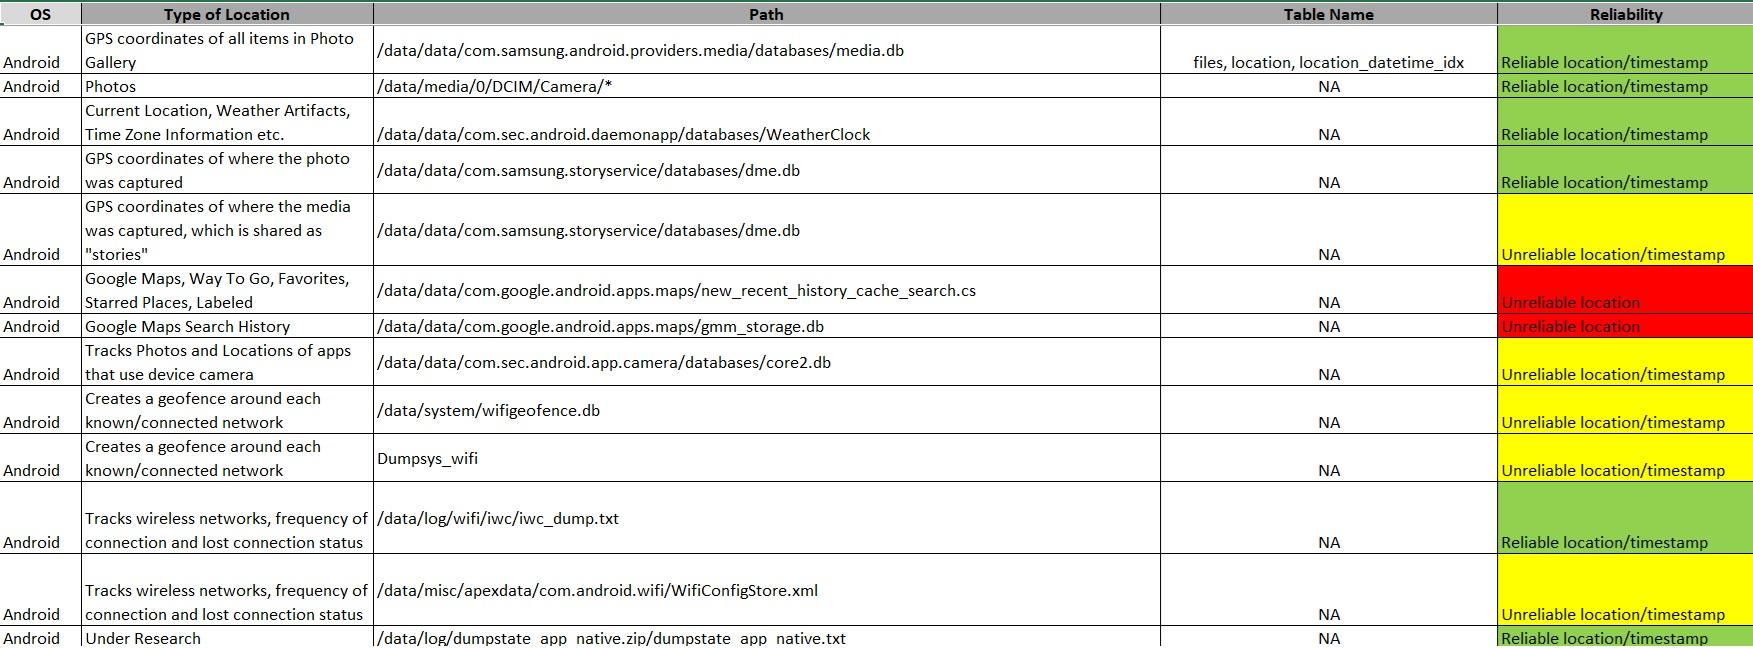

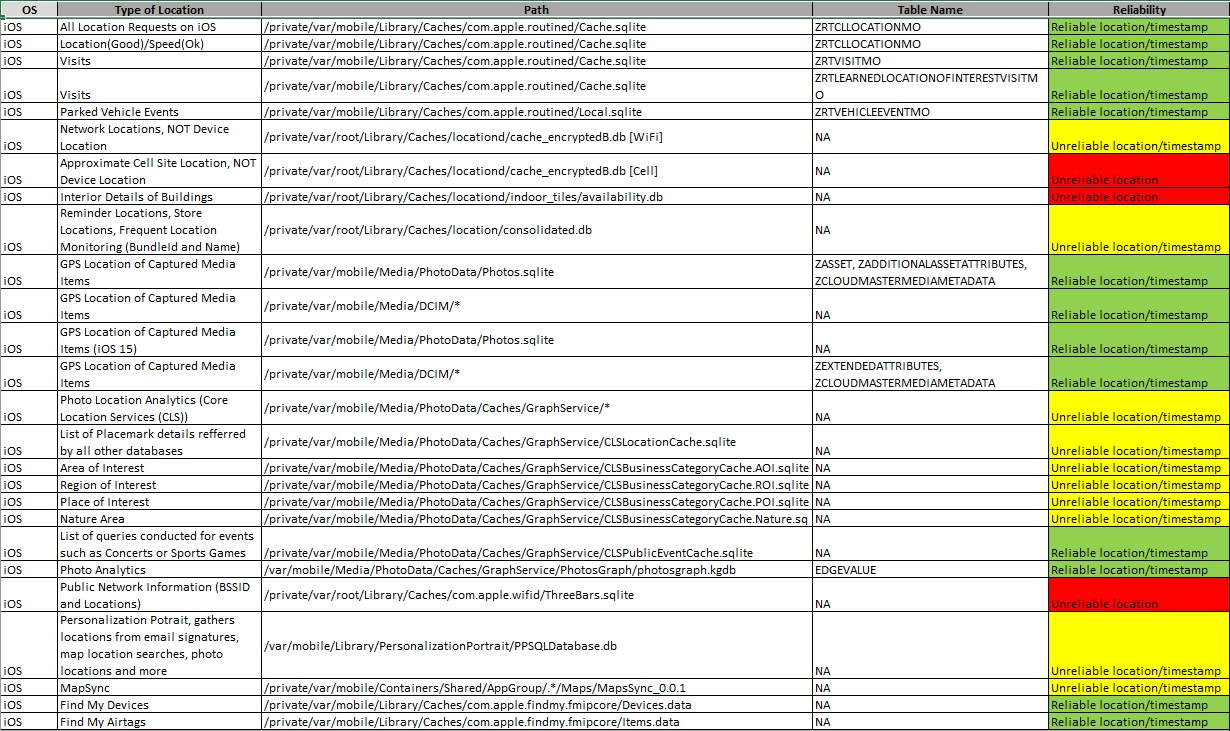

## 3 Cell tower visualisation

### 3a Download UMTS cell tower information from Swisscom and filter locations in Biel and store in new csv in your notebook

In [27]:
import folium
import pandas as pd

cell_towers_csv = "/content/gdrive/MyDrive/Testdata/xy_pwr_umts_170101.csv"

# Read the CSV file into a Pandas DataFrame (assuming the uploaded file name is 'xy_pwr_umts_170101.csv')
df_towers = pd.read_csv(cell_towers_csv, sep=';')

# Center coordinates of Biel
biel_center_coordinates = "47.1381, 7.2467"

# Define the filtering boundaries for the 5 x 5 km area around the center  (approximately 0.045 degrees)
boundary_distance = 0.045

# Function to calculate distance between two sets of coordinates
def calculate_distance(coord1, coord2):
    lat1, lon1 = [float(val) for val in coord1.split(', ')]
    lat2, lon2 = [float(val) for val in coord2.split(', ')]
    return ((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2) ** 0.5

# Filter the towers within the specified area
filtered_towers = df_towers[df_towers['Coordinates'].apply(
    lambda coord: calculate_distance(coord, biel_center_coordinates) <= boundary_distance
)]
filtered_towers


,ID,Coordinates,Geo Shape,Longitude,Latitude,Powercode,Powercode.1,Powercode.2,Powercode.3
69,103,"47.13671837451504, 7.255587869731409","{""coordinates"": [7.255587869731409, 47.1367183...",47.136718,7.255588,Mittel,Medium,Media,Moyenne
199,292,"47.12625746604414, 7.239518904572458","{""coordinates"": [7.239518904572458, 47.1262574...",47.126257,7.239519,Mittel,Medium,Media,Moyenne
228,331,"47.14807995070366, 7.245317585038221","{""coordinates"": [7.245317585038221, 47.1480799...",47.148080,7.245318,Mittel,Medium,Media,Moyenne
596,803,"47.13397077280427, 7.247543691180214","{""coordinates"": [7.247543691180214, 47.1339707...",47.133971,7.247544,Klein,Weak,Debole,Faible
898,1268,"47.1436971010196, 7.272412316656629","{""coordinates"": [7.272412316656629, 47.1436971...",47.143697,7.272412,Mittel,Medium,Media,Moyenne
...,...,...,...,...,...,...,...,...,...
11884,16216,"47.14898548488604, 7.278302556437657","{""coordinates"": [7.278302556437657, 47.1489854...",47.148985,7.278303,Klein,Weak,Debole,Faible
11932,16285,"47.12940287609875, 7.253925994539409","{""coordinates"": [7.253925994539409, 47.1294028...",47.129403,7.253926,Mittel,Medium,Media,Moyenne
11996,16367,"47.1187115351004, 7.250602872209965","{""coordinates"": [7.250602872209965, 47.1187115...",47.118712,7.250603,Mittel,Medium,Media,Moyenne
12043,16418,"47.140445950083304, 7.246874496030449","{""coordinates"": [7.246874496030449, 47.1404459...",47.140446,7.246874,Mittel,Medium,Media,Moyenne


### 3b Visualise the cell towers using Folium. Use the powercode column as a measure for the radius for a circle with the center at the cell tower location(make sensible assumptions on scale)

In [28]:
# Create a map centered at Biel and zoomed in
m = folium.Map(location=[float(coord) for coord in biel_center_coordinates.split(', ')], zoom_start=13)

# Function to set circle radius based on power code
def get_circle_radius(power_code):
    if power_code.lower() == 'strong':
        return 10  # Adjust the radius as needed
    elif power_code.lower() == 'medium':
        return 7
    elif power_code.lower() == 'weak':
        return 5
    else:
        return 3

# Loop through the filtered towers and add circles to the map
for index, row in filtered_towers.iterrows():
    circle_radius = get_circle_radius(row['Powercode.1'])
    circle_color = 'red'
    circle_opacity = 0.5  # Adjust the opacity as needed

    folium.CircleMarker(
        location=[float(coord) for coord in row['Coordinates'].split(', ')],
        radius=circle_radius,
        color=circle_color,
        fill=True,
        fill_color=circle_color,
        fill_opacity=circle_opacity
    ).add_to(m)

# Display the map in the Colab notebook
m


### 3c Combine this view with the view presented in example 7 showing locations that were visited in Biel

In [29]:
# Create a map centered at Biel and zoomed in
m = folium.Map(location=[float(coord) for coord in biel_center_coordinates.split(', ')], zoom_start=13)

# Function to set circle radius based on power code
def get_circle_radius(power_code):
    if power_code.lower() == 'strong':
        return 10  # Adjust the radius as needed
    elif power_code.lower() == 'medium':
        return 7
    elif power_code.lower() == 'weak':
        return 5
    else:
        return 3

# Loop through the filtered towers and add circles to the map
for index, row in filtered_towers.iterrows():
    circle_radius = get_circle_radius(row['Powercode'])
    circle_color = 'red'
    circle_opacity = 0.5  # Adjust the opacity as needed

    folium.CircleMarker(
        location=[float(coord) for coord in row['Coordinates'].split(', ')],
        radius=circle_radius,
        color=circle_color,
        fill=True,
        fill_color=circle_color,
        fill_opacity=circle_opacity
    ).add_to(m)

# Read the CSV file into a Pandas DataFrame (assuming the uploaded file name is 'output.csv')
df = pd.read_csv('/content/gdrive/MyDrive/Testdata/my_locations_in_biel_20230822.csv')

# Function to set marker color based on accuracy
def get_marker_color(accuracy):
    if accuracy < 50:
        return 'darkblue'
    elif accuracy < 100:
        return 'blue'
    else:
        return 'lightblue'

# Function to generate Google Maps link
def generate_google_maps_link(latitude, longitude):
    formatted_latitude = f"{latitude:.7f}"
    formatted_longitude = f"{longitude:.7f}"
    return f"https://www.google.nl/maps/place/{formatted_latitude}N+{formatted_longitude}E"

# Loop through the DataFrame rows and add markers to the map
for index, row in df.iterrows():
    marker_color = get_marker_color(row['accuracy'])

    popup_html = (
        f"<div><b>Date Time:</b> {row['datetime']}</div>"
        f"<div><b>Source:</b> {row['source']}</div>"
        f"<div><b>Accuracy:</b> {row['accuracy']}</div>"
        f"<div><b>Activity:</b> {row['most_likely_activity']}</div>"
        f"<div><b>Latitude:</b> {row['latitude']}</div>"
        f"<div><b>Longitude:</b> {row['longitude']}</div>"
        f"<div><a href='{generate_google_maps_link(row['latitude'], row['longitude'])}' target='_blank'>Google Maps</a></div>"
    )

    popup = folium.Html(popup_html, script=True)
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup, parse_html=True),
        icon=folium.Icon(color=marker_color)
    ).add_to(m)

# Display the map in the Colab notebook
m
